# Mall Customer Segmentation – Exploratory Data Analysis (EDA)

Objective:
Understand customer demographics and spending behavior to guide clustering strategy.

Dataset:
Mall_Customers.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
df = pd.read_csv(r'D:\Bridgeon\TASK\Customer_Segmentation_Clustering\data\Mall_Customers.csv')#Use a Raw StringAdd an r before the opening quote. This tells Python to treat backslashes as literal characters.
print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


### Initial Observations
- Dataset contains 200 customers and 5 features
- No missing values present
- Numerical features are on very different scales

### Feature Description
- CustomerID: Unique identifier (not useful for clustering)
- Gender: Categorical demographic feature
- Age: Customer age
- Annual Income (k$): Income level
- Spending Score (1–100): Mall-assigned spending behavior score

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Observations – Missing Values

- **No missing values** are present in any of the columns (`CustomerID`, `Gender`, `Age`, `Annual Income (k$)`, `Spending Score (1-100)`).

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

###  Age Distribution
Plotting the age distribution helps us see which age group most customers belong to and which age groups are less represented in the mall.

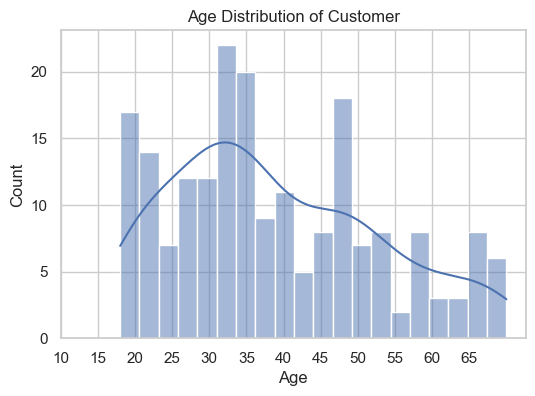

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'],bins=20,kde=True)
plt.title("Age Distribution of Customer")
plt.xticks(range(10,df['Age'].max(),5))
plt.show()

### Income vs. Spending Score
This helps to understand how income relates to spending behavior and to check whether customers naturally form groups.

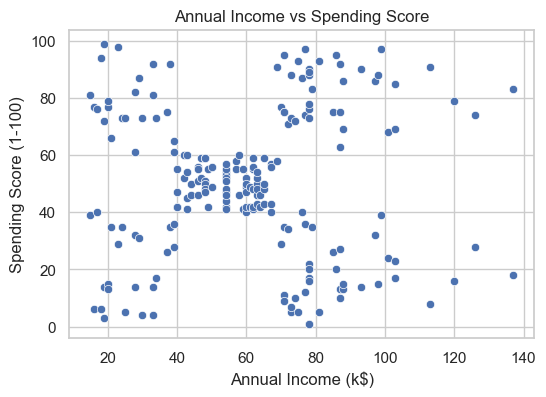

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data= df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)"
)
plt.title("Annual Income vs Spending Score")
plt.show()

### Gender vs Spending Score
Boxplot helps to compare spending behavior between males and females and check whether gender has a significant impact on how much customers spend.

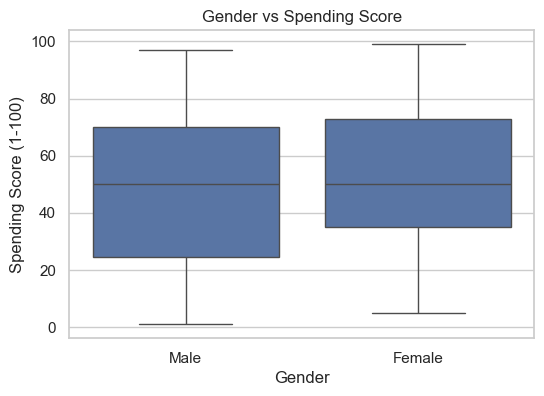

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='Gender',
    y='Spending Score (1-100)'
)
plt.title("Gender vs Spending Score")
plt.show()

### Age vs Spending Score
Helps to understand how spending behavior changes with age and to see whether different age groups show distinct spending patterns.

Text(0.5, 1.0, 'Age vs Spending Score')

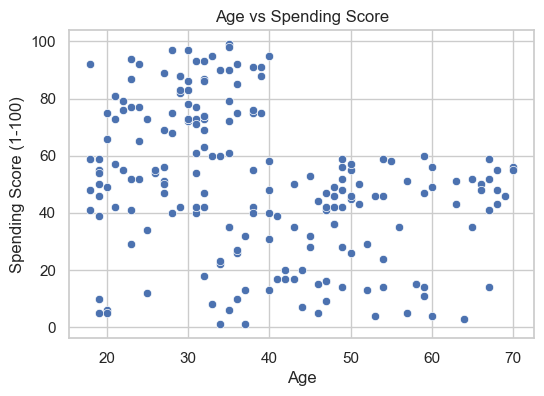

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='Age',
    y='Spending Score (1-100)'
)
plt.title('Age vs Spending Score')


## Key EDA Insights
- Age Distribution shows that most mall customers are young to middle-aged, with fewer older customers.
- Annual Income vs Spending Score shows that customers with similar incomes can have very different spending behaviors, forming clear groups.
- Gender vs Spending Score compares male and female spending patterns and shows that both genders have a wide range of spending behavior.
- This graph shows that customers of different ages have very different spending habits, so age alone does not determine how much a customer spends.

### EDA Conclusion 
- CustomerID will be excluded from modeling
- Income and Spending Score are strong candidates for clustering
- Scaling will be necessary due to different feature ranges
- Visual patterns suggest clustering is appropriate

Next Step:
Feature engineering and preprocessing